# Business Problem

# Apollo Hospitals was established in 1983, renowned as the architect of modern healthcare in India. As the nation's first corporate hospital, Apollo Hospitals is acclaimed for pioneering the private healthcare revolution in the country.                                                                                                                         As a data scientist working at Apollo 24/7, the ultimate goal is to tease out meaningful and actionable insights from Patient-level collected data.              You can help Apollo hospitals to be more efficient, to influence diagnostic and treatment processes, to map the spread of a pandemic.                                    One of the best examples of data scientists making a meaningful difference at a global level is in the response to the COVID-19 pandemic, where they have improved information collection, provided ongoing and accurate estimates of infection spread and health system demand, and assessed the effectiveness of government policies.

In [234]:
import numpy as np
import pandas as pd
df1=pd.read_csv(r'C:\Users\chapp\Downloads\apollo.csv')
df1.head(5)

,",age,sex,smoker,region,viral load,severity level,hospitalization charges"
0,"0,19,female,yes,southwest,9.3,0,42212"
1,"1,18,male,no,southeast,11.26,1,4314"
2,"2,28,male,no,southeast,11.0,3,11124"
3,"3,33,male,no,northwest,7.57,0,54961"
4,"4,32,male,no,northwest,9.63,0,9667"


In [235]:
columns1=list(df1.columns)[0].split(",")
columns1

['',
 'age',
 'sex',
 'smoker',
 'region',
 'viral load',
 'severity level',
 'hospitalization charges']

In [236]:
l=[]
for i in range(len(df1)):
    v=list(df1.loc[i,:])
    l.append(v[0].split(","))
    
df=pd.DataFrame(l,columns=columns1)
df.head(5)

,,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.3,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.0,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


In [237]:
df['age']=df['age'].astype(int)
#df['viral load']=df['viral load'].astype(int)
df['viral load']=df['viral load'].astype(float)
df['severity level']=df['severity level'].astype(int)
df['hospitalization charges']=df['hospitalization charges'].astype(int)

In [238]:
df.shape

(1338, 8)

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
                           1338 non-null object
age                        1338 non-null int32
sex                        1338 non-null object
smoker                     1338 non-null object
region                     1338 non-null object
viral load                 1338 non-null float64
severity level             1338 non-null int32
hospitalization charges    1338 non-null int32
dtypes: float64(1), int32(3), object(4)
memory usage: 68.0+ KB


In [240]:
df.isnull().sum()

                           0
age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

In [241]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [242]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [243]:
df.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [244]:
df['severity level'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: severity level, dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='count'>

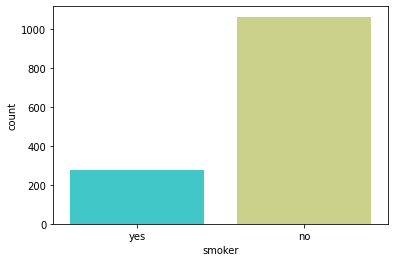

In [245]:
import seaborn as sns
sns.countplot(x='smoker',data=df, palette='rainbow')

<AxesSubplot:xlabel='region', ylabel='count'>

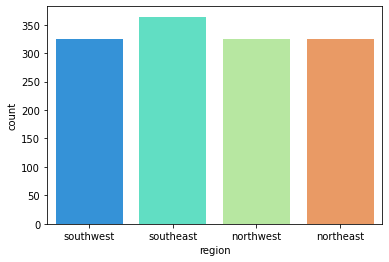

In [246]:
sns.countplot(x='region',data=df, palette='rainbow')

<AxesSubplot:xlabel='sex', ylabel='count'>

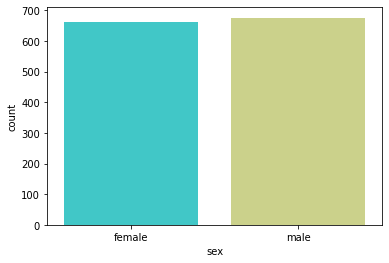

In [247]:
sns.countplot(x='sex',data=df, palette='rainbow')

<AxesSubplot:xlabel='severity level', ylabel='count'>

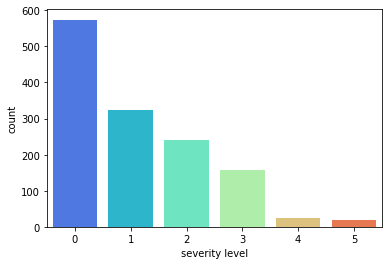

In [248]:
sns.countplot(x='severity level',data=df, palette='rainbow')

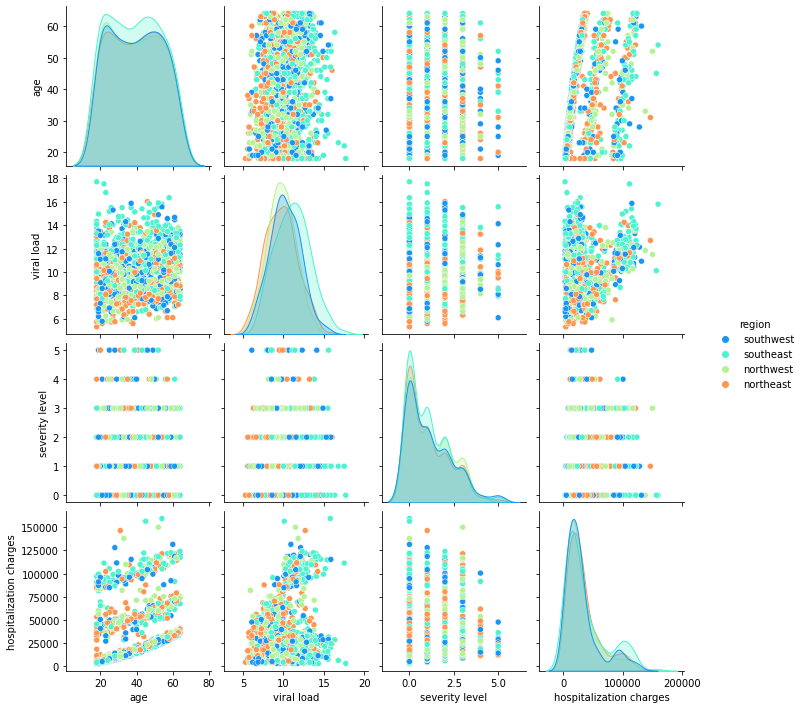

In [249]:
sns.pairplot(df,palette='rainbow',hue='region')

# T test

In [250]:
donotsmoke=df[df['smoker']=="yes"]['hospitalization charges'].sample(250)
smoke=df[df['smoker']=="no"]['hospitalization charges'].sample(250)

In [251]:
donotsmoke.std()

28569.192378762873

In [252]:
smoke.std()

14743.963036451802

In [253]:
# Null Hypothesis:Hospitalization of people who smoke is same as that of people who do not smoke
#Alternate Hypothesis:Hospitalization of people who smoke is greater than  that of people who do not smoke

In [254]:
from scipy.stats import ttest_ind
def t_test(x,y,alternative='both-sided'):
    
    _, double_p = ttest_ind(x,y,equal_var = False)
    if alternative == 'both-sided':
        pval = double_p
    elif alternative == 'greater':
        if np.mean(x) > np.mean(y):
            pval = double_p/2.
        else:
            pval = 1.0 - double_p/2.
    elif alternative == 'less':
        if np.mean(x) < np.mean(y):
            pval = double_p/2.
        else:
            pval = 1.0 - double_p/2.
    return pval
t_test(donotsmoke,smoke,alternative='greater')

1.1270583501880628e-97

In [255]:
# Reject Null hypothesis

In [256]:
# Null Hypothesis: Viral load of male and female is same
# Alternate Hypothesis: Viral load of male and female is different

In [257]:
maleviralload=df[df['sex']=="male"]['viral load']
femaleviralload=df[df['sex']=='female']['viral load']

In [258]:
maleviralload.std()

2.0468891934763755

In [259]:
femaleviralload.std()

2.0154017361616767

In [260]:
ttest_ind(maleviralload,femaleviralload)

Ttest_indResult(statistic=1.695711164450323, pvalue=0.0901735841670204)

In [261]:
#Reject Null Hypothesis

# Chi square test

In [262]:
#Null Hypothesis: proportion of smoking is same across all regions
#Alternate Hypothesis: proportion of smoking is different acros all regions

In [263]:
crossdf=pd.crosstab(df['region'],df['smoker'],margins=True, margins_name="Total")
crossdf

smoker,no,yes,Total
region,,,
northeast,257,67,324
northwest,267,58,325
southeast,273,91,364
southwest,267,58,325
Total,1064,274,1338


In [264]:
import scipy.stats
data=[['northeast','no'] for i in range(257)]+\
[['northeast','yes'] for i in range(67)]+\
[['northwest','no'] for i in range(267)]+\
[['northwest','yes'] for i in range(58)]+\
[['southeast','no'] for i in range(273)]+\
[['southeast','yes'] for i in range(91)]+\
[['southwest','no'] for i in range(267)]+\
[['southwest','yes'] for i in range(58)]

df2=pd.DataFrame(data,columns=['region','smoker'])
#significance level
alpha=0.05
chisquare=0
rows=df['region'].unique()
cols=df['smoker'].unique()
for i in cols:
    for j in rows:
        obs=crossdf[i][j]
        e=crossdf[i]['Total']*(crossdf['Total'][j])/(crossdf['Total']['Total'])
        chisquare+=(obs-e)**2/e 
pval=1-scipy.stats.chi2.cdf(chisquare,(len(rows)-1)*(len(cols)-1))
print("P val:",pval) 


P val: 0.06171954839170546


In [265]:
#Fail to reject Null hypothesis

# ANOVA

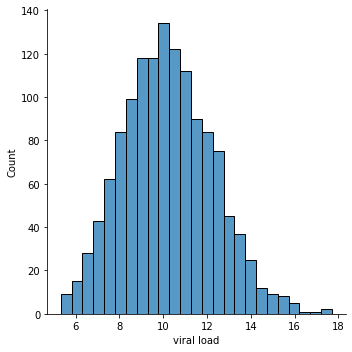

In [266]:
sns.displot(df['viral load'].sample(1338))

In [267]:
# null hypothesis: series is normal
# Alt hypothesis: series is not normal
from scipy.stats import shapiro 
w,pval=shapiro(df['viral load'].sample(1338))
pval

2.6902040190179832e-05

In [268]:
# reject Null Hypothesis

In [269]:
wvl0=df[(df['sex']=='female') & (df['severity level']==0)]['viral load']
wvl1=df[(df['sex']=='female') & (df['severity level']==1)]['viral load']
wvl2=df[(df['sex']=='female') & (df['severity level']==2)]['viral load']

In [270]:
# Checking for equal variance
# Null Hypothesis: equal variance
# Alternate Hypothesis: not equal variance

# levene test

from scipy.stats import levene
test,pval=levene(wvl0,wvl1,wvl2)
pval

0.38987253596513605

In [271]:
#Fail to reject Null hypothesis

In [272]:
# one Condition for Anova is satisfied

In [273]:
#Null Hypothesis:mean viral load of women with severity level 0,severity level 1,severity level 2 are same
#Alternate Hypothesis: mean viral load of women with severity level 0,severity level 1,severity level 2 are different

In [274]:
from scipy.stats import f_oneway
test,pval=f_oneway(wvl0,wvl1,wvl2)
pval

0.7151189650367746

In [275]:
#Fail to reject Null Hypothesis

# Conclusion:


# Recommendations